# Generate Markov Random Field with Pymc

In [1]:
import numpy as np
import scipy as sp
import pymc as pm
import pymc3 as pm3
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.pyplot as plt
from matplotlib import animation
import networkx as nx
from time import strftime, gmtime
#import graph_tool.all as gt
%matplotlib inline  

Using gpu device 0: TITAN X (Pascal) (CNMeM is enabled with initial size: 70.0% of memory, cuDNN 5105)
/home/tianpei/anaconda3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
from latent_random_network import latent_random_field as lat_rf 

##  Independent Set MCMC

In [3]:
from simulation import IndepSetMC, IsingModel

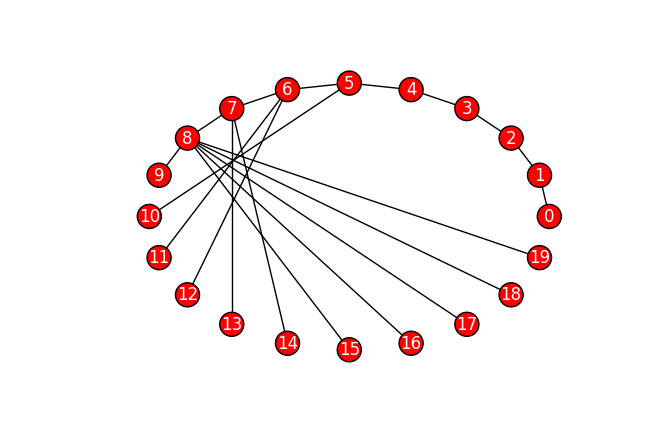

In [4]:
savefigure = False
seed = 1000
choice = 'tree'
d = 10
if choice == 'newman':
    size = 20
    prob = 0
    option= {'seed': seed, 'node_dim': d, 'model': 'newman'}
    option['k-NN'] = 2  
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)
elif choice == 'partition':
    size = [10, 10]
    prob = [0.9, 0.1]
    option= {'seed': seed, 'node_dim': d, 'model': 'partition'}
    option['cutoff_freq'] = 12
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)
elif choice == 'grid':
    size = [20, 20]
    prob = 0.6
    d = 1
    option= {'seed': seed, 'node_dim': d, 'model': 'grid'}
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option)
elif choice == 'binomial':
    size = 20
    prob = 0.18
    option= {'seed': seed, 'node_dim': d, 'model': 'binomial'}
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option)
elif choice == 'tree':
    size = 20
    gamma = 3
    prob = 0
    option= {'seed': seed, 'node_dim': d, 'gamma': gamma ,'model': 'tree'}
    option['cutoff_freq'] = 11
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)

In [5]:
M = IsingModel(G0, size)
#M = IndepSetMC(G0)
M.sample(100)

TypeError: 'int' object is not subscriptable

In [ ]:
bin_transform = lambda x: 2*x - 1
trace_all = []
for i, v in enumerate(G0.nodes_iter()):
    trace_all.append(np.vectorize(bin_transform)(M.trace(str(v))[:].astype(int)))
trace_all = np.asarray(trace_all)

In [ ]:
view_angle = [25, 25]
M.animate(G0, True)
#M.draw(G0, view_angle, 99)

In [ ]:
#M.animate(G0, view_angle, True)